In [3]:
import lane_detection
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
img = cv2.cvtColor(cv2.imread("lanes_test.png"), cv2.COLOR_BGR2RGB)
plt.imshow(img)

error: OpenCV(4.5.1) ../modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


7


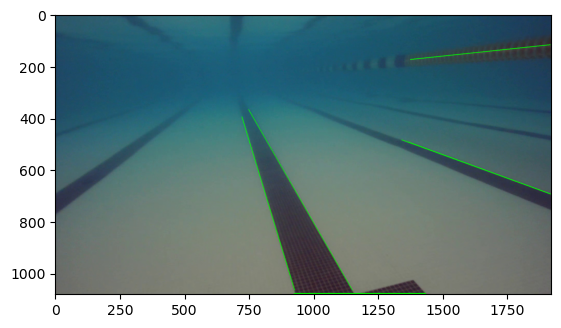

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 300, 350, apertureSize=5)  # Detect edges
lines = cv2.HoughLinesP(
                edges,
                1,
                np.pi/180,
                100,
                minLineLength=500,
                maxLineGap=30,
        ) # detect lines

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

print(len(lines))
plt.imshow(img)

In [ ]:
lines = lane_detection.detect_lines(img, 300, 350, 5, 500, 3)
print(lines)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] [[[ 748  369 1156 1075]]

 [[ 750  367 1152 1063]]

 [[ 724  395  928 1062]]

 [[ 722  396  929 1074]]

 [[1368  492 1918  692]]

 [[1344  484 1917  692]]]
[[[ 748  369 1156 1075]]

 [[ 750  367 1152 1063]]

 [[ 724  395  928 1062]]

 [[ 722  396  929 1074]]

 [[1368  492 1918  692]]

 [[1344  484 1917  692]]]


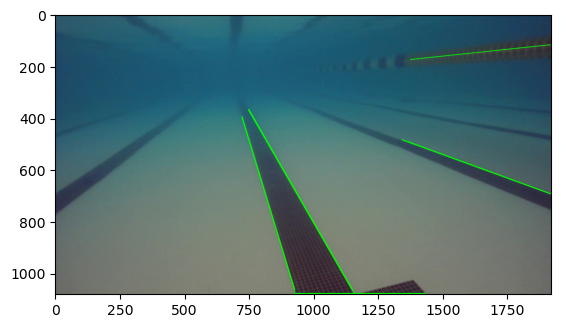

In [ ]:
lane_detection.draw_lines(img, lines)
plt.imshow(img)

In [ ]:
detected = lane_detection.detect_lanes(lines)
print(detected)

[[(array([[ 722,  396,  929, 1074]], dtype=int32), array([-2.0797546]), array([912.40707965])), (array([[ 724,  395,  928, 1062]], dtype=int32), array([-2.02735562]), array([918.83508246]))], [(array([[ 748,  369, 1156, 1075]], dtype=int32), array([-1.86279683]), array([946.08923513])), (array([[ 750,  367, 1152, 1063]], dtype=int32), array([-1.81723238]), array([951.95545977]))], [(array([[1344,  484, 1917,  692]], dtype=int32), array([-0.24186047]), array([3345.15384615])), (array([[1368,  492, 1918,  692]], dtype=int32), array([-0.2283105]), array([3522.96]))]]


[(array([[ 722,  396,  929, 1074]], dtype=int32), array([-2.0797546]), array([912.40707965])), (array([[ 724,  395,  928, 1062]], dtype=int32), array([-2.02735562]), array([918.83508246]))]
[(array([[ 748,  369, 1156, 1075]], dtype=int32), array([-1.86279683]), array([946.08923513])), (array([[ 750,  367, 1152, 1063]], dtype=int32), array([-1.81723238]), array([951.95545977]))]
[(array([[1344,  484, 1917,  692]], dtype=int32), array([-0.24186047]), array([3345.15384615])), (array([[1368,  492, 1918,  692]], dtype=int32), array([-0.2283105]), array([3522.96]))]


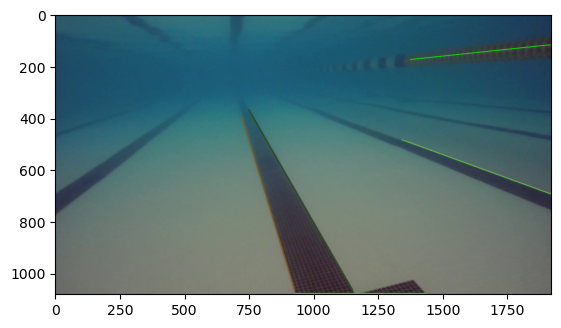

In [ ]:
lane_detection.draw_lanes(img, detected)
plt.imshow(img)